In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic' #malgun Gothic
rcParams['figure.figsize']=17,8

import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv('titanic.csv',index_col=0)
print(test)
test.head()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test.shape

(891, 11)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


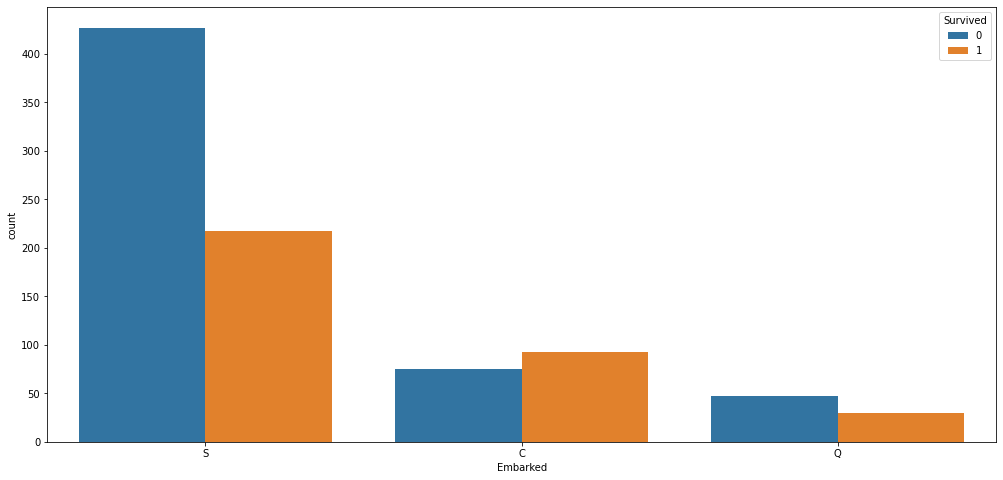

In [5]:
sns.countplot(data=test, x='Embarked', hue='Survived')

In [14]:
#Embarked칼럼에서 결측치가 있는 데이터 확인하기
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [12]:
#Embarked의 값이 'S'인 데이터 확인하기
test.loc[test.Embarked.isnull(),'Embarked']='S'

In [13]:
test.Embarked = test.Embarked.fillna("S")

In [ ]:
#Embarked칼럼에서 결측치가 있는 데이터 확인하기 -> S로 바꿔서 넣어줘서 결측치 안나옴
test[test.Embarked.isnull()]

#### 각각의 승선의 위치마다 승객이 몇명이 탔을까요? %로 나타내주세요

In [33]:
#승선 위치마다 탑승객 수
test.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#총 몇 명 탔나요
test.shape[0] 

In [35]:
ratio = test['Embarked'].value_counts() / test.shape[0] *100
ratio

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

#### 성별에 따라 사람들이 얼마나 생존했는지 알고 싶어요(시각화)

<AxesSubplot:xlabel='Sex', ylabel='count'>

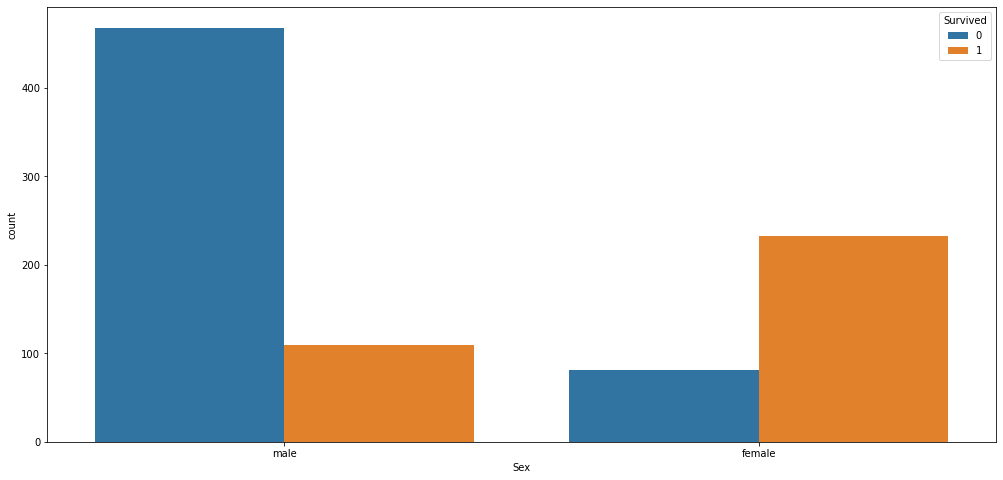

In [43]:
sns.countplot(data=test,x='Sex',hue='Survived')

#### X축 : Pclass(좌석등급) & Y축 : fare , hue : Survived Barplot 그리기

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

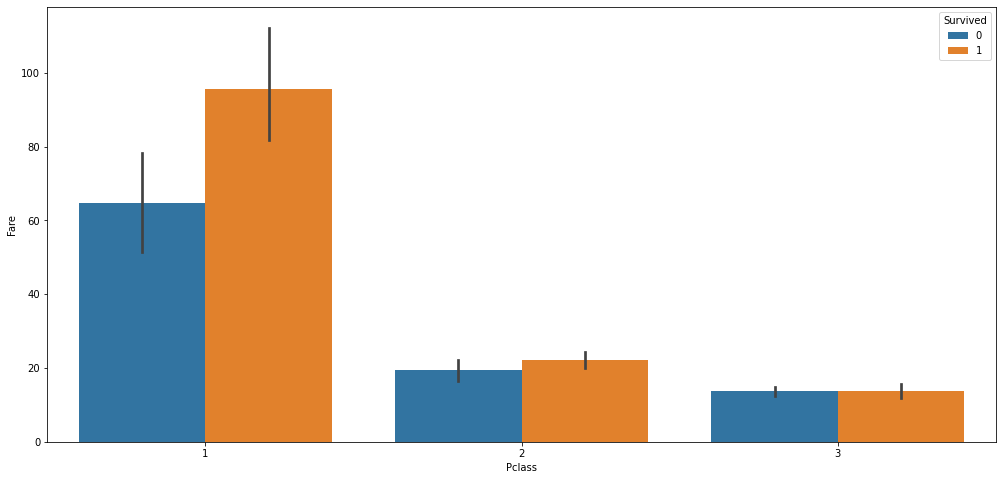

In [44]:
sns.barplot(data=test, x='Pclass',y='Fare',hue='Survived')

In [45]:
#요금이 500불 이상인 사람의 데이터를 뽑아주세요
test[test.Fare>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [46]:
# 위 3명의 요금을 1/3로 수정해주세요
test.loc[test.Fare>500, 'Fare'] = 512/3

In [49]:
# 생존자/ 비생존자의 displot 그리기 (요금)
perish = test[test.Survived==0]
survivor = test[test.Survived==1]

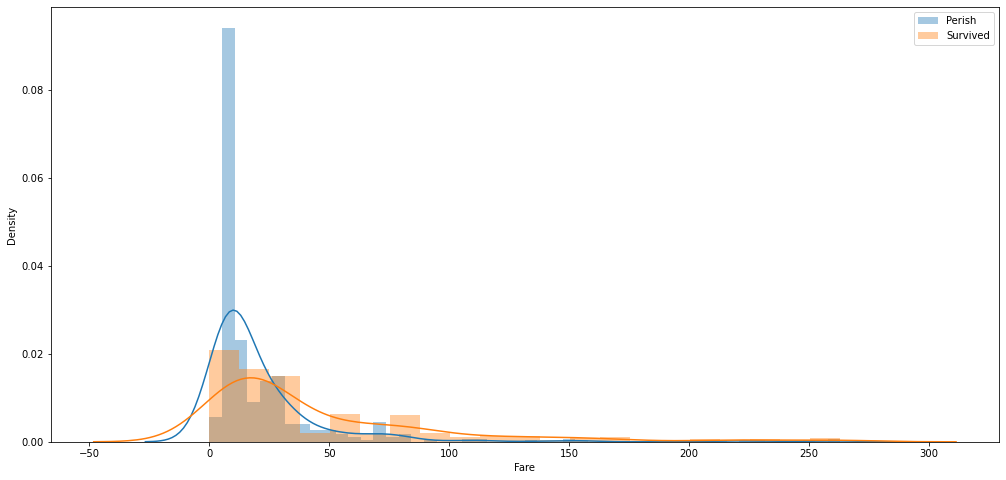

In [53]:
sns.distplot(perish.Fare,label='Perish')
sns.distplot(survivor.Fare,label='Survived')
plt.legend() # 범례 표시

### lmplot

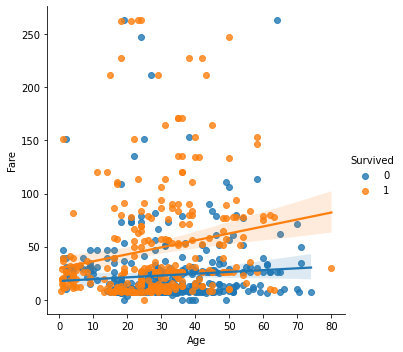

In [52]:
sns.lmplot(data=test, x='Age', y='Fare', hue='Survived')

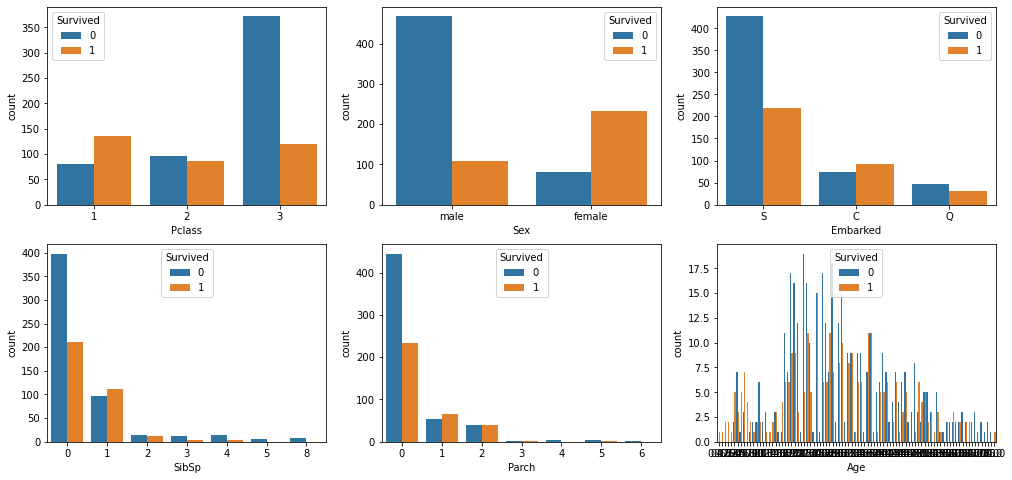

In [70]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(nrows=2, ncols=3,figsize=(17,8))
sns.countplot(data=test,x='Pclass',hue='Survived',ax=ax1)
sns.countplot(data=test,x='Sex',hue='Survived',ax=ax2)
sns.countplot(data=test,x='Embarked',hue='Survived',ax=ax3)
sns.countplot(data=test,x='SibSp',hue='Survived',ax=ax4)
sns.countplot(data=test,x='Parch',hue='Survived',ax=ax5)
sns.countplot(data=test,x='Age',hue='Survived',ax=ax6)

plt.savefig('Titanic.pdf')

In [73]:
# Family_Size라는 칼럼을 추가해주세요(SibSp+Parch 칼럼 합쳐서)
test['Family_size'] = test.SibSp+test.Parch
#test['Family_Size'] = test[test['SibSp']]+test[test['Parch']]
test.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [76]:
#Family_size를 가지고 0이면 Alone이라는 컬럼 1이라고 기록, 0이 아니면 Alone컬럼에 0이라고 기록해주세요
test.loc[test.Family_size==0, 'Alone']=1
test.loc[test.Family_size!=0, 'Alone']=0
test.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0


<AxesSubplot:xlabel='Family_size', ylabel='count'>

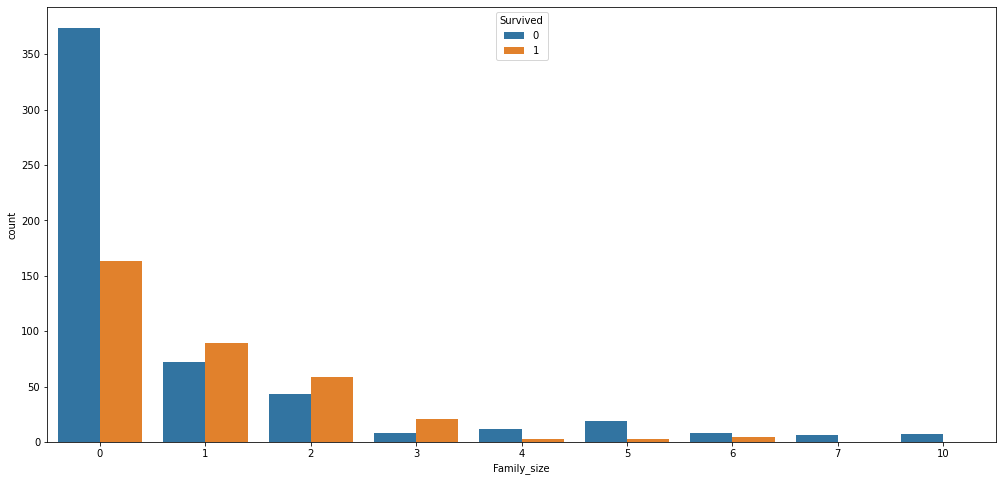

In [77]:
sns.countplot(data=test, x='Family_size',hue='Survived')